In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#  Statistical Analysis-1

# Submitted by: Group 20

# Members: 

1. Snigdha Bhattacharjee - PGID: 12220067
2. Bharathy Rajagopal    - PGID: 12220018
3. Umesh Chandra Lohani  - PGID: 12220085
4. Abhishek Gurujapally  - PGID: 12220055


# Assumptions Made below:

# Introduction:
    
In this Statistical analysis group project we are dealing with a dataset of small-scale units consisting of 10,000 line items in the undivided state of Andhra Pradesh. Here, we will discuss the statistical analysis carried out on a dataset which also contains quite a good amount of outliers, and the analysis is conducted in two different ways: including and excluding the outliers depending on the Project requirements and research questions			

# Methodology:
    
The dataset is first cleaned by removing any missing values or duplicates. Then, basic descriptive statistics such as mean, standard deviation, and standard error are calculated for the dataset.			
After the initial analysis, the dataset is divided into two groups - one with outliers and the other without outliers. The outliers are identified using different techniques, such as the interquartile range (IQR). The IQR method identifies outliers as any data point that falls below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR. 


# Descriping the requirement to follow two different ways of approaching the dataset and the rationale behind it

Q1 - Both ways- Dataset with/without the outliers
Q2 , Q3, Q4b,c,d,Q8,Q9- Dataset Without Outliers
Q4a , Q5,Q6, Q7,Q10- Original Dataset.

"The presence of outliers in this dataset can have a significant impact on the probability estimates derived from that dataset. Outliers are data points that are significantly different from the majority of the data in the dataset. Outliers can occur due to errors in data collection, measurement, or simply due to natural variability in the data.

If a dataset contains outliers, the probability estimates derived from that dataset may be biased or skewed. This is because the presence of outliers can increase the variance of the data, making it more difficult to accurately estimate the underlying probability distribution. Therefore, it is important to identify and handle outliers appropriately when analyzing a dataset to avoid biased or inaccurate probability estimates. This can involve removing the outliers from the dataset, transforming the data to reduce the impact of outliers, or using statistical methods that are robust to outliers. 
For Q2, Q3, Q4b, c d and Q8,Q9 the analysis is carried out without the outliers"

"At the same time, we have to consider that outliers represent legitimate data: Outliers are not necessarily bad data points and may actually represent legitimate observations. Removing outliers may introduce bias: Removing outliers may introduce bias in the data by altering the distribution of the data and the underlying relationships between variables. This may result in incorrect conclusions and invalid hypothesis testing results. Outliers may provide valuable insights: Outliers can provide valuable insights into the data and reveal important patterns or relationships that may not be apparent from the rest of the data. Removing them may result in a loss of valuable information and insights.
In conclusion, outliers should not be automatically removed from a dataset when conducting hypothesis testing. Instead, researchers should carefully examine the data and consider whether the outliers represent legitimate data points and whether they should be included in the analysis.
For Q4a , Q5,Q6, Q7,Q10 we have considered the full datasets without removing the Outliers"

# Conclusion
"In Conclusion, Overall, including or excluding outliers from the statistical analysis can significantly impact the results and interpretation of the data. Therefore, it is important to conduct a statistical analysis on datasets with and without outliers to fully understand the nature of the data and make informed decisions about the analysis.
In some cases, the presence of outliers may be important and relevant to the research question. For example, if the research question is to identify the highest and lowest values in a dataset, including the outliers may be important to provide an accurate representation of the data. In such cases, excluding the outliers may lead to inaccurate conclusions.
However, in other cases, the presence of outliers may not be relevant to the research question or may have a significant impact on the results of the analysis. For example, if the research question is to determine the average value of a dataset, the presence of outliers may skew the results and make the average value less representative of the majority of the data.

Therefore, it is important to consider the research question and the impact of outliers when conducting a statistical analysis. Depending on the research question, it may be appropriate to conduct the analysis with and without outliers to determine the impact of their presence on the results and draw accurate conclusions.


# Importing the dataset

In [2]:
Group20_data=pd.read_excel('D:/ISB_LMS/05_Statistical Analysis-1/SA1 Group Project/SA1_Group20_Dataset.xlsx')

In [3]:
Group20_data.head()

,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,REPAYMENT_DELAY,DECLINE_IN_GOP,DMD_PROB,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB
0,26222,100937.0,28,12,14.0,1,13549.0,1,,12,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61229,87025.0,28,9,42.0,1,9506.0,1,,12,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16430,88319.0,28,6,NaN,2,406030.0,1,,8,...,NaN,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3829,13193.0,28,14,22.0,2,0.0,1,,12,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11926,46792.0,28,21,54.0,1,25649.0,1,,12,...,NaN,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0


In [4]:
Group20_data.describe()

,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,OPER_DUR_MM,OPER_DUR_DD,...,REPAYMENT_DELAY,DECLINE_IN_GOP,DMD_PROB,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB
count,10000.000000,9.999000e+03,10000.0,10000.000000,7400.000000,10000.000000,8042.000000,10000.0,10000.000000,3107.000000,...,1398.000000,10000.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,30952.295500,5.186043e+04,28.0,11.821400,40.803378,1.513200,185553.187391,1.0,10.563100,14.513035,...,1.841917,1.859800,1.470080,1.381246,1.858112,1.748920,1.952498,1.690932,1.866749,1.969772
std,17899.816734,3.790460e+04,0.0,5.879775,280.569010,0.499851,198436.963114,0.0,2.100538,6.694132,...,0.364949,0.347212,0.499258,0.485843,0.349043,0.433768,0.212775,0.462252,0.339951,0.171268
min,11.000000,1.000000e+00,28.0,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15513.250000,2.526400e+04,28.0,6.000000,16.000000,1.000000,10700.250000,1.0,10.000000,10.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,30956.500000,5.114300e+04,28.0,13.000000,26.000000,2.000000,23745.000000,1.0,12.000000,15.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,46257.000000,7.719300e+04,28.0,16.000000,36.000000,2.000000,406140.000000,1.0,12.000000,20.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,61995.000000,1.244123e+06,28.0,23.000000,9042.000000,2.000000,920040.000000,1.0,12.000000,40.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Asnwer 1

### Checking the distribution of the GOP_diff_wrt_py & Perf_effi_per_emp before outlier removal

In [5]:
# Calculating two different measures

Group20_data['GOP_diff_wrt_py']=Group20_data['GOP_Year3']-Group20_data['GOP_Year2']

Group20_data['Perf_effi_per_emp']=Group20_data['GOP_Year3']/Group20_data['EMP_TOTAL']

<AxesSubplot:>

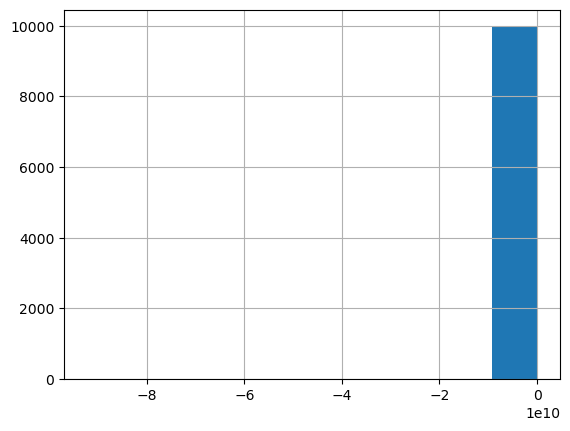

In [6]:
Group20_data['GOP_diff_wrt_py'].hist()

<AxesSubplot:>

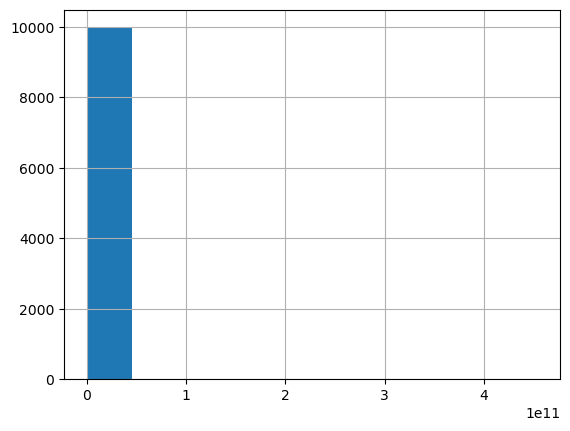

In [7]:
Group20_data['Perf_effi_per_emp'].hist()

In [8]:
Group20_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              10000 non-null  int64  
 1   SL_NO              9999 non-null   float64
 2   ST_CODE            10000 non-null  int64  
 3   DIST_CODE          10000 non-null  int64  
 4   TTM_CODE           7400 non-null   float64
 5   SECTOR_CODE        10000 non-null  int64  
 6   VT_CODE            8042 non-null   float64
 7   WORKED_FOR_1D      10000 non-null  int64  
 8   CLOSED_Y           10000 non-null  object 
 9   OPER_DUR_MM        10000 non-null  int64  
 10  OPER_DUR_DD        3107 non-null   float64
 11  SURVEY_CODE        10000 non-null  int64  
 12  NIC_CODE           10000 non-null  int64  
 13  PERM_REG_Y         9837 non-null   float64
 14  FACTORY_ACT        10000 non-null  int64  
 15  INIT_PROD_Y        9849 non-null   float64
 16  UNIT_TYPE          1000

In [9]:
# Group20_data_new is the copy of the dataset without Outliers

Group20_data_new=Group20_data.copy()

In [10]:
Group20_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              10000 non-null  int64  
 1   SL_NO              9999 non-null   float64
 2   ST_CODE            10000 non-null  int64  
 3   DIST_CODE          10000 non-null  int64  
 4   TTM_CODE           7400 non-null   float64
 5   SECTOR_CODE        10000 non-null  int64  
 6   VT_CODE            8042 non-null   float64
 7   WORKED_FOR_1D      10000 non-null  int64  
 8   CLOSED_Y           10000 non-null  object 
 9   OPER_DUR_MM        10000 non-null  int64  
 10  OPER_DUR_DD        3107 non-null   float64
 11  SURVEY_CODE        10000 non-null  int64  
 12  NIC_CODE           10000 non-null  int64  
 13  PERM_REG_Y         9837 non-null   float64
 14  FACTORY_ACT        10000 non-null  int64  
 15  INIT_PROD_Y        9849 non-null   float64
 16  UNIT_TYPE          1000

# Removing the Outlier for Two Created Measures : GOP_diff_wrt_py & Perf_effi_per_emp Column

In [11]:
# Null Check
pd.isnull(Group20_data['GOP_diff_wrt_py']).any()

True

In [12]:
Group20_data['GOP_diff_wrt_py'].fillna(0,inplace = True )

GOP_Eff_Q1 = np.percentile(Group20_data['GOP_diff_wrt_py'],25)
GOP_Eff_Q3 = np.percentile(Group20_data['GOP_diff_wrt_py'],75)
GOP_Eff_IQR = GOP_Eff_Q3-GOP_Eff_Q1

GOP_Eff_Outlier_max = GOP_Eff_Q3 + 1.5 * GOP_Eff_IQR
GOP_Eff_Outlier_min =  GOP_Eff_Q1 - 1.5 * GOP_Eff_IQR

print(Group20_data[Group20_data['GOP_diff_wrt_py']>GOP_Eff_Outlier_max]['GOP_diff_wrt_py'].count()) #1498

print(Group20_data[Group20_data['GOP_diff_wrt_py']<GOP_Eff_Outlier_min]['GOP_diff_wrt_py'].count()) #814

Group20_data.drop((Group20_data[Group20_data['GOP_diff_wrt_py']>GOP_Eff_Outlier_max]).index,inplace=True)
Group20_data.drop((Group20_data[Group20_data['GOP_diff_wrt_py']<GOP_Eff_Outlier_min]).index,inplace=True)

Group20_data.shape

1498
814


(7688, 67)

In [13]:
pd.isnull(Group20_data['GOP_diff_wrt_py']).any()

False

In [14]:
## Removing the Outlier for Perf_effi_per_emp column

Performance_Eff_Q1 = np.percentile(Group20_data['Perf_effi_per_emp'],25)
Performance_Eff_Q3 = np.percentile(Group20_data['Perf_effi_per_emp'],75)
Performance_Eff_IQR = Performance_Eff_Q3-Performance_Eff_Q1

Performance_Eff_Outlier_max = Performance_Eff_Q3 + 1.5 * Performance_Eff_IQR
Performance_Eff_Outlier_min =  Performance_Eff_Q1 - 1.5 * Performance_Eff_IQR

print(Group20_data[Group20_data['Perf_effi_per_emp']>Performance_Eff_Outlier_max]['Perf_effi_per_emp'].count()) #530
print(Group20_data[Group20_data['Perf_effi_per_emp']<Performance_Eff_Outlier_min]['Perf_effi_per_emp'].count()) #0

Group20_data.drop((Group20_data[Group20_data['Perf_effi_per_emp']>Performance_Eff_Outlier_max]).index,inplace=True)
Group20_data.drop((Group20_data[Group20_data['Perf_effi_per_emp']<Performance_Eff_Outlier_min]).index,inplace=True)

Group20_data.shape

530
0


(7158, 67)

<AxesSubplot:>

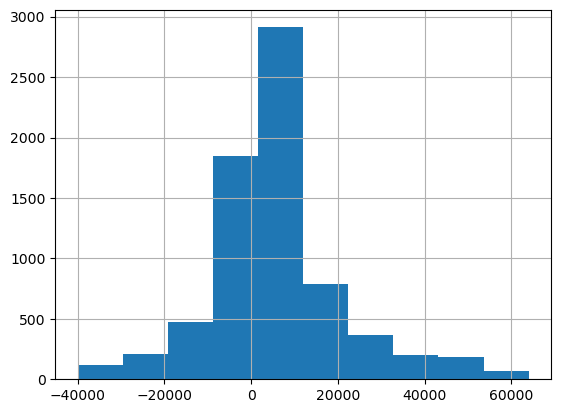

In [15]:
Group20_data['GOP_diff_wrt_py'].hist()

<AxesSubplot:>

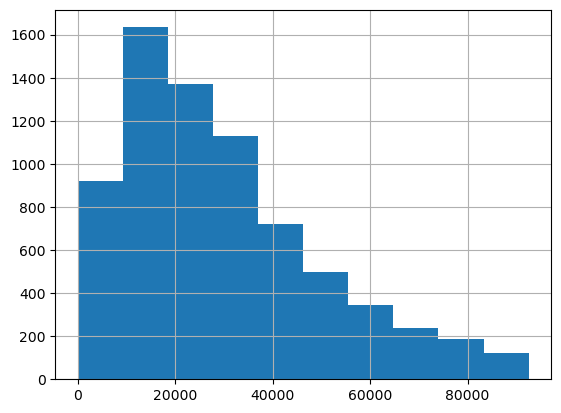

In [16]:
Group20_data['Perf_effi_per_emp'].hist()

In [17]:
Group20_data['GOP_Year3'].describe()

count    7.158000e+03
mean     1.090446e+05
std      1.420728e+05
min      0.000000e+00
25%      3.600000e+04
50%      7.000000e+04
75%      1.250000e+05
max      3.068000e+06
Name: GOP_Year3, dtype: float64

In [18]:
sample_df=Group20_data['GOP_Year3']

In [19]:
sample_df.describe()

count    7.158000e+03
mean     1.090446e+05
std      1.420728e+05
min      0.000000e+00
25%      3.600000e+04
50%      7.000000e+04
75%      1.250000e+05
max      3.068000e+06
Name: GOP_Year3, dtype: float64

### Question 1 Solution before removing the Outliers

In [20]:
# Given Info as per Question 1

# Calculating Mean

xbar=Group20_data_new['GOP_Year3'].mean()
print('Mean for GOP_Year3',xbar)

# Calculating Standard Deviation

samplesd=Group20_data_new['GOP_Year3'].std()
print('Standard Deviation for GOP_Year3',samplesd)

# Considering the Given data as Sample , calculating the standard error below

n=Group20_data_new['GOP_Year3'].count()

print('Total row count of sample:',n)

se = samplesd/np.sqrt(n)

print('Standard Error:',se)

Mean for GOP_Year3 92780031.0842
Standard Deviation for GOP_Year3 9081047608.507324
Total row count of sample: 10000
Standard Error: 90810476.08507325


In [21]:
# For a given Confidence of 95% , alpha=1-0.95=0.05

alpha=1-0.95 # For a confidence Interval of 95%

print('alpha',alpha)

# Calculating Confidence Interval as per t-distribution

stats.t.interval(0.95, df = n-1, loc = xbar, scale = samplesd/np.sqrt(n))

alpha 0.050000000000000044


(-85226778.88781765, 270786841.0562177)

### Above Calculated Confidence Interval is bit unrealistic measure for population Mean of GOP_Year3

### Question 1 Solution after removing the Outliers

In [22]:
# Given Info as per Question 1

# Calculating Mean

xbar1=Group20_data['GOP_Year3'].mean()
print('Mean for GOP_Year3',xbar)

# Calculating Standard Deviation

samplesd1=Group20_data['GOP_Year3'].std()
print('Standard Deviation for GOP_Year3',samplesd)

# Considering the Given data as Sample , calculating the standard error below

n=Group20_data['GOP_Year3'].count()

print('Total row count of sample:',n)

se = samplesd/np.sqrt(n)

print('Standard Error:',se)

Mean for GOP_Year3 92780031.0842
Standard Deviation for GOP_Year3 9081047608.507324
Total row count of sample: 7158
Standard Error: 107334689.79771964


In [23]:
# For a given Confidence of 95% , alpha=1-0.95=0.05

alpha=1-0.95 # For a confidence Interval of 95%

print('alpha',alpha)

# Calculating Confidence Interval as per t-distribution

stats.t.interval(0.95, df = n-1, loc = xbar1, scale = samplesd1/np.sqrt(n))

alpha 0.050000000000000044


(105752.75316647296, 112336.39966951475)

In [24]:
# Calculating Confidence Interval using Lower Limit & Upper Limit Manually

# From t-table , t-critical value for 95% confidence interval & degree of freedom=9999

t_critical=1.960 # As per t-table for 95% confidence Interval

print('t_critical',t_critical)

lower_limit=xbar1-(t_critical)*(samplesd1/np.sqrt(n))
upper_limit=xbar1+(t_critical)*(samplesd1/np.sqrt(n))

print('Confidence Interval:',lower_limit," to ",upper_limit)

t_critical 1.96
Confidence Interval: 105753.24938662993  to  112335.90344935778


# Answer 2

# Calculating two different Performance Measures

# 1. Growth/decline of GOP 

### 2. Formula : Year on Year Gross output= Gross output Year3- Gross output year2

### 3. Definition : 

#### This performance measure indicates whether the business unit has grown or declined in terms of the amount of output it has generated over the course of the year.If the year on year change in gross output is positive, it means that the business unit has grown its output compared to the previous year. This can be a positive sign of the business unit's performance and can indicate that it is meeting its objectives and expanding its operations.On the other hand, if the year on year change in gross output is negative, it means that the business unit has declined in terms of output compared to the previous year. This can be a cause for concern and may indicate that the business unit is facing challenges such as increased competition, declining demand, or operational inefficiencies.Overall, year on year change in gross output is an important metric for evaluating the performance of a business unit over time and assessing its ability to achieve growth and meet its objectives.

### 4. Rationale : 

#### Considering the year on year change in gross output as a KPI for each business unit (SSSBE and SSI) is important because it provides insight into the performance of each unit over time. This allows the company to identify areas of strength and areas for improvement in each business unit, and allocate resources accordingly.By comparing the year on year change in gross output between the two business units, the company can also identify which unit is performing better and investigate the reasons behind the difference. This can help the company to identify best practices and apply them across the organization, leading to overall improvements in performance.Additionally, tracking the year on year change in gross output can help the company to identify trends in the market and adjust its strategy accordingly. For example, if one business unit experiences a decline in output while the other experiences growth, the company may need to shift resources or adjust its product offerings to respond to changing customer demands.Overall, considering the year on year change in gross output as a KPI for each business unit provides valuable information for strategic decision making and helps ensure the long-term success of the company.


In [25]:
Group20_data['GOP_diff_wrt_py']=Group20_data['GOP_Year3']-Group20_data['GOP_Year2']

# 2. Performance Efficiency 

### 2. Formula : Gross output year3/ No of employees

### 3. Definition : 

#### This performance measure indicates that a business unit is utilizing its resources effectively and efficiently to generate maximum output with the minimum amount of labor input. An operationally efficient business unit would typically have a high labor productivity, as measured by the ratio of gross output to the number of employees. This means that each employee is contributing a significant amount of value to the output generated by the business unit. Additionally, an operationally efficient business unit may also have low overhead costs and a streamlined organizational structure that enables it to respond quickly and efficiently to changing market conditions.

### 4. Rationale : 

#### Considering the KPI of gross output divided by the number of employees for each business unit (SSSBE and SSI) is important because it provides insight into the productivity of each unit. This KPI helps to measure the efficiency with which the business unit is utilizing its resources, particularly its labor force, to generate output.
#### By comparing the labor productivity of each business unit, the company can identify which unit is more efficient in utilizing its resources, and investigate the reasons for the difference. This can help the company to identify areas for improvement, such as optimizing processes or investing in employee training and development, which can ultimately lead to increased efficiency and profitability.
#### Additionally, tracking the labor productivity of each business unit over time can help the company to identify trends and adjust its resource allocation accordingly. For example, if one business unit has a significantly lower labor productivity than the other, the company may need to investigate the reasons behind the difference and adjust its staffing levels or training programs to improve operational efficiency.
#### Overall, considering the KPI of gross output divided by the number of employees for each business unit provides valuable information for optimizing resource utilization and improving overall productivity, which are critical for the long-term success of the company.


In [26]:
Group20_data['Perf_effi_per_emp']=Group20_data['GOP_Year3']/Group20_data['EMP_TOTAL']

#### Checking the Distribution of the two measures After Outlier Removal

<AxesSubplot:>

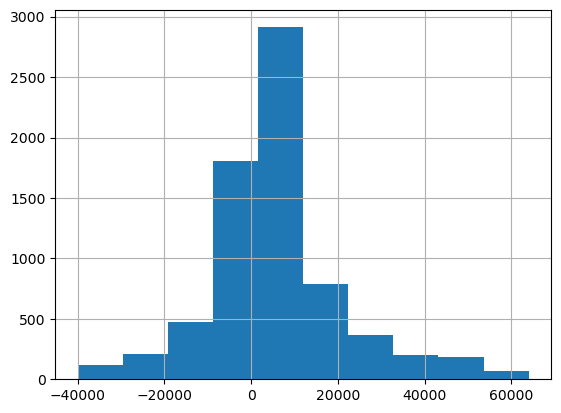

In [27]:
Group20_data['GOP_diff_wrt_py'].hist()

<AxesSubplot:>

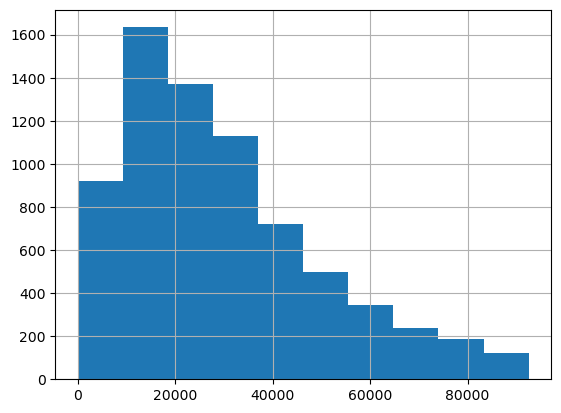

In [28]:
Group20_data['Perf_effi_per_emp'].hist()

In [29]:
Group20_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7158 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7158 non-null   int64  
 1   SL_NO              7157 non-null   float64
 2   ST_CODE            7158 non-null   int64  
 3   DIST_CODE          7158 non-null   int64  
 4   TTM_CODE           5580 non-null   float64
 5   SECTOR_CODE        7158 non-null   int64  
 6   VT_CODE            5656 non-null   float64
 7   WORKED_FOR_1D      7158 non-null   int64  
 8   CLOSED_Y           7158 non-null   object 
 9   OPER_DUR_MM        7158 non-null   int64  
 10  OPER_DUR_DD        2149 non-null   float64
 11  SURVEY_CODE        7158 non-null   int64  
 12  NIC_CODE           7158 non-null   int64  
 13  PERM_REG_Y         7043 non-null   float64
 14  FACTORY_ACT        7158 non-null   int64  
 15  INIT_PROD_Y        7043 non-null   float64
 16  UNIT_TYPE          7158 

In [30]:
Group20_data.shape

(7158, 67)

# Answer 3

#### Calculating 99 % Confidence interval for First Measure i.e GOP_diff_wrt_py

In [31]:
## GOP_diff_wrt_py

xbar2=Group20_data['GOP_diff_wrt_py'].mean()

samplesd2=Group20_data['GOP_diff_wrt_py'].std()

n=Group20_data['GOP_diff_wrt_py'].count()

# As n=10000 , so degree of freedom=10000-1

df=n-1

stats.t.interval(0.99, df = n-1, loc = xbar2, scale = samplesd2/np.sqrt(n))

(5731.296322427638, 6668.55371969536)

### Calculating 99 % Confidence interval for Second Measure i.e Performance_Efficiency_per_employee

In [32]:
# 99 % Confidence interval for Second Measure

# Performance_Efficiency_per_employee

xbar3=Group20_data['Perf_effi_per_emp'].mean()

print('Average Performance per Employee:',xbar1)

samplesd3=Group20_data['Perf_effi_per_emp'].std()

n=Group20_data['Perf_effi_per_emp'].count()

# As n=10000 , so degree of freedom=10000-1

df=n-1

stats.t.interval(0.99, df = n-1, loc = xbar3, scale = samplesd3/np.sqrt(n))

Average Performance per Employee: 109044.57641799386


(29080.705804902114, 30305.239161417543)

# Interpretion of these confidence intervals in terms of their relevance to the management.

### For the First measure Growth/decline of GOP, we are 99% confident that the  true population mean of the KPI-Growth/Decline of GOP falls within this range of values between 5731.29 and 6668.55.

### For the management , Overall, the 99% confidence interval for a business unit's KPI of growth/decline of gross output can provide valuable information to management that can be used to make informed decisions and by providing valuable information about the performance of the unit. For example, if the confidence interval for the KPI of growth/decline of gross output is narrow, it suggests that the business unit's performance is consistent and predictable, and management may be able to set more aggressive targets. Conversely, if the confidence interval is wider, it suggests that the business unit's performance is more variable and unpredictable, and management may need to set more conservative targets.

### For the Second measure of Performance efficiency, we are 99% confident that the true population mean of the ratio falls within this range of values. This would indicate that we can estimate with 99% confidence that the average gross output per employee for the business unit is somewhere between 29080.71 to 30305.24.

### With relevance to the management, the confidence interval for a business unit's gross output divided by number of employees can be useful in assessing the precision and accuracy of the ratio estimate, and can inform decision making related to resource allocation, operational efficiency, and overall performance of the business unit.




# Answer 4

## Part 4 a

#### Assumptions :

#### For this question We will use Sample data before removing the outliers. The reason behind is if we use the data without Outlier , we will dropping a sufficient amount of data i.e 28% of records , so to get the actual probablity for the Random Units to be SSSBE will come only with Original Dataset.because in the UNIT_TYPE we don't have a Null.

In [33]:
# Calculating probablity that a firm selected random is an SSSBE Unit?

# From the Assignment Code book , necessary details are 
# 1 stands for SSI 
# 2 stands for SSSBE

In [34]:
Group20_data_new.shape

(10000, 67)

In [35]:
Group20_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              10000 non-null  int64  
 1   SL_NO              9999 non-null   float64
 2   ST_CODE            10000 non-null  int64  
 3   DIST_CODE          10000 non-null  int64  
 4   TTM_CODE           7400 non-null   float64
 5   SECTOR_CODE        10000 non-null  int64  
 6   VT_CODE            8042 non-null   float64
 7   WORKED_FOR_1D      10000 non-null  int64  
 8   CLOSED_Y           10000 non-null  object 
 9   OPER_DUR_MM        10000 non-null  int64  
 10  OPER_DUR_DD        3107 non-null   float64
 11  SURVEY_CODE        10000 non-null  int64  
 12  NIC_CODE           10000 non-null  int64  
 13  PERM_REG_Y         9837 non-null   float64
 14  FACTORY_ACT        10000 non-null  int64  
 15  INIT_PROD_Y        9849 non-null   float64
 16  UNIT_TYPE          1000

In [36]:
# Total Row Count

Total_count=Group20_data_new['UNIT_TYPE'].count()

print('Total_Unit_Count',Total_count)

# SSSBE_Count

SSSBE_Count=Group20_data_new[Group20_data_new['UNIT_TYPE']==2]['UNIT_TYPE'].count()

print('SSSBE_Unit_Count',SSSBE_Count)

print('Answer : 4a - Hence probablity that a Random Selected firm is an SSSBE Unit::',SSSBE_Count/Total_count)

Total_Unit_Count 10000
SSSBE_Unit_Count 2156
Answer : 4a - Hence probablity that a Random Selected firm is an SSSBE Unit:: 0.2156


## Part 4b

#### For this question We will use Sample data after removing the outliers. Because we are trying to measure the performance of the Randomly selected Units.

#### As we have to calculate the Average Performance of the Units which will not come correctly if we calculate the Data with Outlier #### in this measures we won't get the right values.

In [37]:
Avg_Perf = Group20_data['Perf_effi_per_emp'].mean()

print('Average Performance',Avg_Perf)

Average Performance 29692.97248315983


In [38]:
Group20_data['Avg_Perf']=Avg_Perf

In [39]:
Group20_data.head()

,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB,GOP_diff_wrt_py,Perf_effi_per_emp,Avg_Perf
0,26222,100937.0,28,12,14.0,1,13549.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19000.000000,29692.972483
2,16430,88319.0,28,6,NaN,2,406030.0,1,,8,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,-31000.0,45333.333333,29692.972483
6,55225,72257.0,28,11,1.0,1,10932.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,50000.000000,29692.972483
8,35754,37821.0,28,10,33.0,2,10640.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,22500.000000,29692.972483
10,19168,41934.0,28,16,21.0,2,416030.0,1,,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41200.0,79200.000000,29692.972483


In [40]:
Group20_data['Good_Unit']=np.where(Group20_data['Perf_effi_per_emp']>Group20_data['Avg_Perf'],1,0)
Group20_data['Bad_Unit']=np.where(Group20_data['Perf_effi_per_emp']<Group20_data['Avg_Perf'],1,0)

In [41]:
# Count of Small Scale Units performing greater than average performance

Group20_data[Group20_data['Good_Unit']==1]['Good_Unit'].sum()

3035

In [42]:
# Count of Small Scale Units performing lesser than average performance

Group20_data[Group20_data['Bad_Unit']==1]['Bad_Unit'].sum()

4123

In [43]:
Group20_data.head()

,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB,GOP_diff_wrt_py,Perf_effi_per_emp,Avg_Perf,Good_Unit,Bad_Unit
0,26222,100937.0,28,12,14.0,1,13549.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,0.0,19000.000000,29692.972483,0,1
2,16430,88319.0,28,6,NaN,2,406030.0,1,,8,...,2.0,2.0,2.0,2.0,2.0,-31000.0,45333.333333,29692.972483,1,0
6,55225,72257.0,28,11,1.0,1,10932.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,10000.0,50000.000000,29692.972483,1,0
8,35754,37821.0,28,10,33.0,2,10640.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,15000.0,22500.000000,29692.972483,0,1
10,19168,41934.0,28,16,21.0,2,416030.0,1,,10,...,NaN,NaN,NaN,NaN,NaN,41200.0,79200.000000,29692.972483,1,0


In [44]:
# Calculating Prob that a Firm selected randomly will be Good in performance

Probablity_Good_Perf = Group20_data[Group20_data['Good_Unit']==1]['Good_Unit'].sum()/Group20_data['Good_Unit'].count()
Probablity_Good_Perf  ### Answer 4 b

print('Answer : 4B - Probablity that a firm selected at Random is Good in Performance:',Probablity_Good_Perf)

Answer : 4B - Probablity that a firm selected at Random is Good in Performance: 0.4240011176306231


In [45]:
# Calculating Prob that a Firm selected randomly will be Bad in performance

Probablity_Bad_Perf = Group20_data[Group20_data['Bad_Unit']==1]['Bad_Unit'].sum()/Group20_data['Bad_Unit'].count()
Probablity_Bad_Perf ## Answer 4b

print('Answer : 4B - Probablity that a firm selected at Random is Bad in Performance:',Probablity_Bad_Perf)

Answer : 4B - Probablity that a firm selected at Random is Bad in Performance: 0.5759988823693769


## Part 4c

#### For this question We will use Sample data After removing the outliers.

In [46]:
Group20_data['SSSBE_Unit_Count']=np.where(Group20_data['UNIT_TYPE']==2,1,0)
Group20_data_new.head()

,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,DMD_PROB,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB,GOP_diff_wrt_py,Perf_effi_per_emp
0,26222,100937.0,28,12,14.0,1,13549.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19000.000000
1,61229,87025.0,28,9,42.0,1,9506.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56500.0,135100.000000
2,16430,88319.0,28,6,NaN,2,406030.0,1,,8,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,-31000.0,45333.333333
3,3829,13193.0,28,14,22.0,2,0.0,1,,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.0,91666.666667
4,11926,46792.0,28,21,54.0,1,25649.0,1,,12,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,-31200.0,112011.111111


In [47]:
Group20_data['SSSBE_Unit_GOOD_Perf']=np.logical_and(Group20_data['SSSBE_Unit_Count']==1, Group20_data['Good_Unit']==1)

Group20_data['SSSBE_Unit_GOOD_Perf'].sum()

658

In [48]:
# Total Row count

Group20_data['SSSBE_Unit_GOOD_Perf'].count()

7158

In [49]:
# Calculating probablity that a firm selected is SSSBE Unit & Good in Performance

prob_SSSBE_Unit_GOOD_Perf=Group20_data['SSSBE_Unit_GOOD_Perf'].sum()/Group20_data['SSSBE_Unit_GOOD_Perf'].count()

prob_SSSBE_Unit_GOOD_Perf ## Answer 4 C

0.0919251187482537

In [50]:
# Calculating probablity that a firm selected is SSSBE Unit & Good in Performance

Group20_data['SSSBE_Unit_BAD_Perf']=np.logical_and(Group20_data['SSSBE_Unit_Count']==1, Group20_data['Bad_Unit']==1)

Group20_data['SSSBE_Unit_BAD_Perf'].sum()

prob_SSSBE_Unit_BAD_Perf=Group20_data['SSSBE_Unit_BAD_Perf'].sum()/Group20_data['SSSBE_Unit_BAD_Perf'].count()

prob_SSSBE_Unit_BAD_Perf

0.17937971500419111

# Part 4d

### As per calculation in Answer 4c above , Probablity of the SSSBE Units in terms of Good perf is only 9.19 % (0.0919) while probablity of SSSBE Units with Bad performance is 17.93(0.1793) , so Majority of the SSSBE Units are performing bad.

# Answer 5

# For this question We will use Original Sample data before removing the outliers.

#### As question has asked to test One Sided test , even though As per details given in Questions , it is Two tail test.
#### So we will do Left Tail & Right Tail Test seperately.


# Left Tail Test

In [51]:
# Original Data set provided

Group20_data_new.shape

(10000, 67)

<AxesSubplot:>

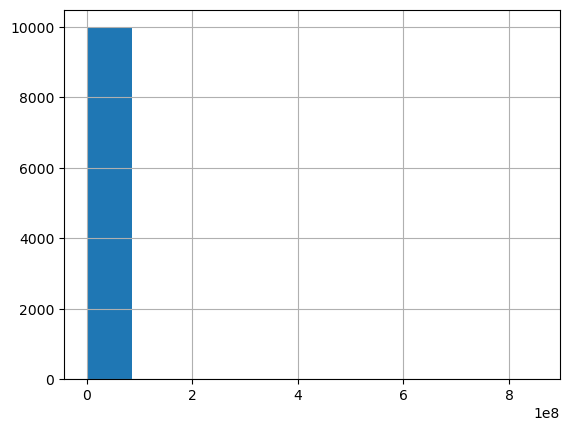

In [52]:
Group20_data_new['VOE_Year3'].hist()

In [53]:
Group20_data_new['VOE_Year3'].describe()

count    1.000000e+04
mean     1.066037e+05
std      8.574303e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.540803e+08
Name: VOE_Year3, dtype: float64

In [54]:
mew=87300

xbar_voe=Group20_data_new['VOE_Year3'].mean()
samplesd_voe = Group20_data_new['VOE_Year3'].std()
n=Group20_data_new['VOE_Year3'].count() # Total Record Count is 1000

print('Sample Size:',n)

print('Sample Mean:',xbar_voe)
print('sample Std Deviation:',samplesd_voe)

t_stat, p_value = stats.ttest_1samp(Group20_data_new['VOE_Year3'], popmean=87300,alternative='less')

print("T-statistic value: ", t_stat)  

print("P-Value: ", p_value)

Sample Size: 10000
Sample Mean: 106603.7403
sample Std Deviation: 8574303.050066367
T-statistic value:  0.22513480322878762
P-Value:  0.5890604962248547


In [55]:
stats.t.interval(0.95, df = n-1, loc = xbar_voe, scale = samplesd_voe/np.sqrt(10000))

(-61469.85643412551, 274677.3370341255)

### Inference from above Hypothesis Testing - Left Tail Test

### As p-value is greater than alpha so we failed to reject Null Hypothesis.So Population mean is greater than equal to 87300. It means Value of the Exports in Year3 in Rs is greater than or equal to Rs 87300/-

# Right Tail Test

In [56]:
mew=87300
xbar_voe1=Group20_data_new['VOE_Year3'].mean()
samplesd_voe1 = Group20_data_new['VOE_Year3'].std()
n=Group20_data_new['VOE_Year3'].count() # Total Record Count is 10000

print('Sample Size:',n)

print('Sample Mean:',xbar_voe1)
print('sample Std Deviation:',samplesd_voe1)

t_stat, p_value = stats.ttest_1samp(Group20_data_new['VOE_Year3'], popmean=87300,alternative='greater')

print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

Sample Size: 10000
Sample Mean: 106603.7403
sample Std Deviation: 8574303.050066367
T-statistic value:  0.22513480322878762
P-Value:  0.41093950377514543


In [57]:
#?stats.ttest_1samp

In [58]:
stats.t.interval(0.95, df = n-1, loc = xbar_voe1, scale = samplesd_voe1/np.sqrt(10000))

(-61469.85643412551, 274677.3370341255)

# Inference from above Hypothesis Testing - Right Tail Test

# As p-value is greater than alpha so we failed to reject Null Hypothesis. So Population mean is less than or equal to 87300. It means Value of the Exports in Year3 in Rs is less than or equal to Rs 87300/-

# Answer 6

In [59]:
from statsmodels.stats.proportion import proportions_ztest

# One Proportion check for SSSBE Units

In [60]:
SSSBE_Count=Group20_data_new[Group20_data_new['UNIT_TYPE']==2]['UNIT_TYPE'].count()
SSI_Count=Group20_data_new[Group20_data_new['UNIT_TYPE']==1]['UNIT_TYPE'].count()
Total_Count=Group20_data_new['UNIT_TYPE'].count()

print('SSSBE_Count',SSSBE_Count)
print('SSI_Count',SSI_Count)
print('Total_Count',Total_Count)

SSSBE_proportion=SSSBE_Count/Total_Count
SSI_proportion=SSI_Count/Total_Count

print('\n')
print('SSSBE_proportion',SSSBE_proportion)
print('SSI_proportion',SSI_proportion)

sample_success = SSSBE_Count
sample_size = Total_Count

significance=0.05 #(Considering default as 0.05 as alpha is not given in question 6)

null_hypothesis = 0.25

stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

print('\n')
print('Inferences are below: \n')

if p_value > significance:
   print ("Fail to reject the null hypothesis - so we would recommend these special incentives for SSSBE")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

SSSBE_Count 2156
SSI_Count 7844
Total_Count 10000


SSSBE_proportion 0.2156
SSI_proportion 0.7844
z_stat: -8.365, p_value: 1.000


Inferences are below: 

Fail to reject the null hypothesis - so we would recommend these special incentives for SSSBE


In [61]:
#?proportions_ztest

# One Proportion check for SSI Units

In [62]:
SSI_Count=Group20_data_new[Group20_data_new['UNIT_TYPE']==1]['UNIT_TYPE'].count()
Total_Count=Group20_data_new['UNIT_TYPE'].count()

SSI_proportion=SSI_Count/Total_Count

print('\n')
print('SSI_proportion',SSI_proportion)

sample_success = SSI_Count
sample_size = Total_Count


significance=0.05 #(Considering default as 0.05 as alpha is not given in question 6)

null_hypothesis = 0.25

stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')

# report
print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))

print('\n')
print('Inferences are below: \n')

if p_value > significance:
   print ("Fail to reject the null hypothesis - so we would recommend these special incentives for SSSBE")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true. so we recommend these special incentives is not required for SSI")



SSI_proportion 0.7844
z_stat: 129.94910, p_value: 0.00000


Inferences are below: 

Reject the null hypothesis - suggest the alternative hypothesis is true. so we recommend these special incentives is not required for SSI


# Answer 7

# Step 1 : Null Hypothesis & Alternate Hypothesis

Ho: proportion of SSSBE_males <= proportion of SSSBE_female

Ha: proportion of SSSBE_males > proportion of SSSBE_female

# Step 2: alpha=0.05


In [63]:
Group20_data_new['SSSBE_Male_Count']=np.logical_and(Group20_data_new['UNIT_TYPE']==2,Group20_data_new['MAN_BY']==1)

Group20_data_new['SSSBE_Female_Count']=np.logical_and(Group20_data_new['UNIT_TYPE']==2,Group20_data_new['MAN_BY']==2)

In [64]:
Group20_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   SL_NO               9999 non-null   float64
 2   ST_CODE             10000 non-null  int64  
 3   DIST_CODE           10000 non-null  int64  
 4   TTM_CODE            7400 non-null   float64
 5   SECTOR_CODE         10000 non-null  int64  
 6   VT_CODE             8042 non-null   float64
 7   WORKED_FOR_1D       10000 non-null  int64  
 8   CLOSED_Y            10000 non-null  object 
 9   OPER_DUR_MM         10000 non-null  int64  
 10  OPER_DUR_DD         3107 non-null   float64
 11  SURVEY_CODE         10000 non-null  int64  
 12  NIC_CODE            10000 non-null  int64  
 13  PERM_REG_Y          9837 non-null   float64
 14  FACTORY_ACT         10000 non-null  int64  
 15  INIT_PROD_Y         9849 non-null   float64
 16  UNIT_

In [65]:
SSSBE_Male_Count=Group20_data_new[Group20_data_new['SSSBE_Male_Count']==True]['SSSBE_Male_Count'].count()
SSSBE_Female_Count=Group20_data_new[Group20_data_new['SSSBE_Female_Count']==True]['SSSBE_Female_Count'].count()

SSSBE_Total_Count=Group20_data_new[Group20_data_new['UNIT_TYPE']==2]['UNIT_TYPE'].count()

#SSSBE_Men_Count

print('SSSBE Men Count',SSSBE_Male_Count)
print('SSSBE Female Count',SSSBE_Female_Count)
print('SSSBE Total Count',SSSBE_Total_Count)

SSSBE Men Count 2090
SSSBE Female Count 66
SSSBE Total Count 2156


In [66]:
# Calculation proportion

SSSBE_Male_proportion=SSSBE_Male_Count/SSSBE_Total_Count

SSSBE_Female_proportion=SSSBE_Female_Count/SSSBE_Total_Count

In [67]:
sample_success = np.array([2090,66])
sample_size = np.array([2156,2156])

significance=0.05 #(Considering default as 0.05 as alpha is not given in question 7)

stat, p_value = proportions_ztest(count=sample_success, nobs=sample_size, alternative='larger')

# report
print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))

print('\n')
print('Inferences are below: \n')

if p_value > significance:
   print ("Fail to reject the null hypothesis - SSSBE Male Proportion is less than equal to SSSBE Female Proportion")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true. SSSBE Male Proportion is greater than SSSBE Female Proportion")

z_stat: 61.64546, p_value: 0.00000


Inferences are below: 

Reject the null hypothesis - suggest that alternative hypothesis is true. SSSBE Male Proportion is greater than SSSBE Female Proportion


In [68]:
#Original Dataset

Group20_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   SL_NO               9999 non-null   float64
 2   ST_CODE             10000 non-null  int64  
 3   DIST_CODE           10000 non-null  int64  
 4   TTM_CODE            7400 non-null   float64
 5   SECTOR_CODE         10000 non-null  int64  
 6   VT_CODE             8042 non-null   float64
 7   WORKED_FOR_1D       10000 non-null  int64  
 8   CLOSED_Y            10000 non-null  object 
 9   OPER_DUR_MM         10000 non-null  int64  
 10  OPER_DUR_DD         3107 non-null   float64
 11  SURVEY_CODE         10000 non-null  int64  
 12  NIC_CODE            10000 non-null  int64  
 13  PERM_REG_Y          9837 non-null   float64
 14  FACTORY_ACT         10000 non-null  int64  
 15  INIT_PROD_Y         9849 non-null   float64
 16  UNIT_

# Answer 8

# Performance measure : GOP_diff_wrt_py

Step 1:

Ho: mew(SSSBE)-mew(SSI)=0 (population mean of performance of SSSBE =  population mean of performance of SSI)

Ha: mew(SSSBE)-mew(SSI)!=0 (population mean of performance of SSSBE !=  population mean of performance of SSI)

Step 2: alpha = 0.05

In [69]:
from scipy.stats import norm, ttest_ind

In [70]:
Group20_data.head()

,Index,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,...,EQUIP_PROB,MGMT_PROB,GOP_diff_wrt_py,Perf_effi_per_emp,Avg_Perf,Good_Unit,Bad_Unit,SSSBE_Unit_Count,SSSBE_Unit_GOOD_Perf,SSSBE_Unit_BAD_Perf
0,26222,100937.0,28,12,14.0,1,13549.0,1,,12,...,NaN,NaN,0.0,19000.000000,29692.972483,0,1,1,False,True
2,16430,88319.0,28,6,NaN,2,406030.0,1,,8,...,2.0,2.0,-31000.0,45333.333333,29692.972483,1,0,0,False,False
6,55225,72257.0,28,11,1.0,1,10932.0,1,,12,...,NaN,NaN,10000.0,50000.000000,29692.972483,1,0,0,False,False
8,35754,37821.0,28,10,33.0,2,10640.0,1,,12,...,NaN,NaN,15000.0,22500.000000,29692.972483,0,1,0,False,False
10,19168,41934.0,28,16,21.0,2,416030.0,1,,10,...,NaN,NaN,41200.0,79200.000000,29692.972483,1,0,0,False,False


In [71]:
# Remove column name 'A'

#Group20_data.drop(['SSI_Unit_GOOD_Perf'], axis=1,inplace=True)
#Group20_data.drop(['SSI_Unit_BAD_Perf'], axis=1,inplace=True)

# Two tail test to determine whether there is a Diff in the Population mean of Performance of SSSBE & SSI

In [72]:
significance=0.05

Group20_data['SSSBE_GOP_diff_wrt_py']=np.where(Group20_data['UNIT_TYPE']==2,Group20_data['GOP_diff_wrt_py'],0)

Samp1=Group20_data['SSSBE_GOP_diff_wrt_py']

Group20_data['SSI_GOP_diff_wrt_py']=np.where(Group20_data['UNIT_TYPE']==1,Group20_data['GOP_diff_wrt_py'],0)

Samp2=Group20_data['SSI_GOP_diff_wrt_py']

tstats,p_value=ttest_ind(Samp1,Samp2,alternative='two-sided')

print('Test Statistics:',tstats)
print('p-value:',p_value)

Test Statistics: nan
p-value: nan


In [73]:
# Inference:

if p_value > significance:
   print ("Fail to reject the null hypothesis - SSSBE Units Performace is same as SSI Units Performance")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is not eauql to the SSI Units Performance")

Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is not eauql to the SSI Units Performance


# Left Tail Test

Step 1: Null & Alternate Hypothesis

Ho: mew(SSSBE)-mew(SSI)>=0 (population mean of performance of SSSBE>=population mean of performance of SSI)

Ha: mew(SSSBE)-mew(SSI)<0 (population mean of performance of SSSBE<population mean of performance of SSI)

In [74]:
significance=0.05

tstats,pvalue=ttest_ind(Samp1,Samp2,alternative='less')
print('Test Statistics:',tstats)
print('p-value:',pvalue)

Test Statistics: nan
p-value: nan


In [75]:
# Inference:

if pvalue > significance:
   print ("Fail to reject the null hypothesis - SSSBE Units Performace is greater than performance of SSI Units")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is less than that of SSI Units")

Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is less than that of SSI Units


# Right Tail Test

Step 1: Null & Alternate Hypothesis

Ho: mew(SSSBE)-mew(SSI)<=0 (population mean of performance of SSSBE<=population mean of performance of SSI)

Ha: mew(SSSBE)-mew(SSI)>0 (population mean of performance of SSSBE>population mean of performance of SSI)

In [76]:
significance=0.05

tstats1,pvalue1=ttest_ind(Samp1,Samp2,alternative='greater')
print('Test Statistics:',tstats1)
print('p-value:',pvalue1)

Test Statistics: nan
p-value: nan


In [77]:
# Inference:
if pvalue1 > significance:
   print ("Fail to reject the null hypothesis - SSSBE Units Performace is Less than that of SSI Units")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is greater than that of SSI Units")


Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is greater than that of SSI Units


# Performance measure : Perf_effi_per_emp

Step 1:

Ho: mew(SSSBE)-mew(SSI)=0 (population mean of performance of SSSBE =  population mean of performance of SSI)

Ha: mew(SSSBE)-mew(SSI)!=0 (population mean of performance of SSSBE !=  population mean of performance of SSI)

Step 2: alpha = 0.05

# Two tail test to determine whether there is a Diff in the Population mean of Performance of SSSBE & SSI

In [78]:
significance=0.05

Group20_data['SSSBE_Perf_effi_per_emp']=np.where(Group20_data['UNIT_TYPE']==2,Group20_data['Perf_effi_per_emp'],0)

Samp3=Group20_data['SSSBE_Perf_effi_per_emp']

Group20_data['SSI_Perf_effi_per_emp']=np.where(Group20_data['UNIT_TYPE']==1,Group20_data['Perf_effi_per_emp'],0)

Samp4=Group20_data['SSI_Perf_effi_per_emp']

tstats,p_value1=ttest_ind(Samp3,Samp4,alternative='two-sided')

print('Test Statistics:',tstats)
print('p-value:',p_value1)

# Inference:

if p_value1 > significance:
   print ("Fail to reject the null hypothesis - SSSBE Units Performace is same as SSI Units Performance")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is not eauql to the SSI Units Performance")

Test Statistics: -50.19229202969718
p-value: 0.0
Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is not eauql to the SSI Units Performance


# Left Tail Test

Step 1: Null & Alternate Hypothesis

Ho: mew(SSSBE)-mew(SSI)>=0 (population mean of performance of SSSBE>=population mean of performance of SSI)

Ha: mew(SSSBE)-mew(SSI)<0 (population mean of performance of SSSBE<population mean of performance of SSI)

In [79]:
significance=0.05

tstats,pvalue2=ttest_ind(Samp3,Samp4,alternative='less')
print('Test Statistics:',tstats)
print('p-value:',pvalue2)

# Inference:

if pvalue2 > significance:
   print ("Fail to reject the null hypothesis - SSSBE Units Performace is greater than performance of SSI Units")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is less than that of SSI Units")

Test Statistics: -50.19229202969718
p-value: 0.0
Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is less than that of SSI Units


# Right Tail Test

Step 1: Null & Alternate Hypothesis

Ho: mew(SSSBE)-mew(SSI)<=0 (population mean of performance of SSSBE<=population mean of performance of SSI)

Ha: mew(SSSBE)-mew(SSI)>0 (population mean of performance of SSSBE>population mean of performance of SSI)

In [80]:
significance=0.05

tstats1,pvalue3=ttest_ind(Samp3,Samp4,alternative='greater')
print('Test Statistics:',tstats1)
print('p-value:',pvalue3)

# Inference:
if pvalue3 > significance:
   print ("Fail to reject the null hypothesis - SSSBE Units Performace is Less than that of SSI Units")
else:
   print ("Reject the null hypothesis - suggest that alternative hypothesis is true.SSSBE Units Performace is greater than that of SSI Units")


Test Statistics: -50.19229202969718
p-value: 1.0
Fail to reject the null hypothesis - SSSBE Units Performace is Less than that of SSI Units


# Final Comments:

### As per two-sided Hypothesis test conducted on 2 defined Performance measures i.e GOP_diff_wrt_py & SSSBE_Perf_effi_per_emp , it is clear that the SSSBE Units performance is not equal to performance of SSI. 

### From Left Tail & Right Tail test , it is also clear that the SSSBE Units performance is less than that of SSI Units. So SSI Units performance is better than SSSBE Units.

# Answer 9

Part a

Ho: p1(Proportion of better performing units in SSSBE)=p2(Proportion of better performing units in SSI) (There is no diff in proportion of Better performing units in SSSBE & SSI)

Ha: p1(Proportion of better performing units in SSSBE)!=p2(Proportion of better performing units in SSI)!=0 (There is diff in proportion of Better performing units in SSSBE & SSI)

# First Measure : GOP_diff_wrt_py

In [81]:
Group20_data.shape

(7158, 77)

In [82]:
# Using pooled proportion test
# Inorder to understand if there is difference in the proportion of better performing units in the SSI and SSBE units, 
# we are using hypothesis tests of proportions.
# We have considered the performance metrics : 1. Gross Output year on year growth/decline (GOP_diff_wrt_py) 

# Null Hypothesis= Proportion of better performing units in SSSBE (p1)= Proportion of better performing  units in SSI (p2)
# NUll Hypothesis Ho: p1 = p2

# Alternate Hypothesis= Proportion of better performing units in SSSBE <> Proportion of better performing  units in SSI
# Alternate Hypothesis : p1 != p2

Group20_data['GOP_diff_wrt_py_SSSBE']=np.where(Group20_data['UNIT_TYPE']==2,Group20_data['GOP_diff_wrt_py'],0)
Group20_data['GOP_diff_wrt_py_SSI']=np.where(Group20_data['UNIT_TYPE']==1,Group20_data['GOP_diff_wrt_py'],0)

AVG_GOP_diff_wrt_SSSBE = Group20_data[Group20_data['GOP_diff_wrt_py_SSSBE']!=0]['GOP_diff_wrt_py_SSSBE'].mean()
AVG_GOP_diff_wrt_SSI = Group20_data[Group20_data['GOP_diff_wrt_py_SSI']!=0]['GOP_diff_wrt_py_SSI'].mean()

GOP_diff_wrt_SSSBE_Good_cnt = Group20_data[Group20_data['GOP_diff_wrt_py_SSSBE']>AVG_GOP_diff_wrt_SSSBE]['GOP_diff_wrt_py_SSSBE'].count()

GOP_diff_wrt_SSI_Good_cnt = Group20_data[Group20_data['GOP_diff_wrt_py_SSI']>AVG_GOP_diff_wrt_SSI]['GOP_diff_wrt_py_SSI'].count()

GOP_diff_wrt_SSI_Good_cnt = GOP_diff_wrt_SSI_Good_cnt/Group20_data[Group20_data['GOP_diff_wrt_py_SSI'] != 0 ]['GOP_diff_wrt_py_SSI'].count()
GOP_diff_wrt_SSSBE_Good_cnt = GOP_diff_wrt_SSSBE_Good_cnt/Group20_data[Group20_data['GOP_diff_wrt_py_SSSBE'] != 0 ]['GOP_diff_wrt_py_SSSBE'].count()

print (f'The proportion of better performing SSSBE units: ',GOP_diff_wrt_SSSBE_Good_cnt)
print (f'The proportion of better performing SSI units: ',GOP_diff_wrt_SSI_Good_cnt)


n1 = Group20_data[Group20_data['GOP_diff_wrt_py_SSSBE'] != 0 ]['GOP_diff_wrt_py_SSSBE'].count()
n2 = Group20_data[Group20_data['GOP_diff_wrt_py_SSI'] != 0 ]['GOP_diff_wrt_py_SSI'].count()
p1 = GOP_diff_wrt_SSSBE_Good_cnt
p2 = GOP_diff_wrt_SSI_Good_cnt

pooled_p = (p1*n1 + p2*n2) / (n1+n2)

StandardError = np.sqrt(pooled_p* (1-pooled_p)*(1/n1+1/n2))
StandardError

# Test Statistics
test_stat = (p1-p2)/StandardError
test_stat

pValue = stats.norm.sf(abs (test_stat))*2
print('p-value',pValue)


#Significance level
alpha = 0.05
#Print the results
if pValue > alpha:
    print("Fail to reject the null hypothesis - Proportion of Better Performing Units in SSSBE is equal to Proportion of Better Performing Units in SSI")
else:
    print ("Reject the null hypothesis - suggest that alternative hypothesis is true.Proportion of Better Performing Units in SSSBE is not equal to Proportion of Better Performing Units in SSI")

The proportion of better performing SSSBE units:  0.4499723604201216
The proportion of better performing SSI units:  0.42521756729407
p-value 0.06897327848708337
Fail to reject the null hypothesis - Proportion of Better Performing Units in SSSBE is equal to Proportion of Better Performing Units in SSI


# Second Measure : Perf_effi_per_emp

In [83]:
# Using pooled proportion test

# Inorder to understand if there is difference in the proportion of better performing units in the SSI and SSBE units, 
# we are using hypothesis tests of proportions.
# We have considered the performance metrics : 2. Performance efficiency per employee (Perf_effi_per_emp) 

# Null Hypothesis= Proportion of better performing units in SSSBE (p1)= Proportion of better performing  units in SSI (p2)
# NUll Hypothesis Ho: p1 = p2

# Alternate Hypothesis= Proportion of better performing units in SSSBE <> Proportion of better performing  units in SSI
# Alternate Hypothesis : p1 != p2

Group20_data['Perf_effi_per_emp_SSSBE']=np.where(Group20_data['UNIT_TYPE']==2,Group20_data['Perf_effi_per_emp'],0)
Group20_data['Perf_effi_per_emp_SSI']=np.where(Group20_data['UNIT_TYPE']==1,Group20_data['Perf_effi_per_emp'],0)

AVg_Perf_effi_per_emp_SSSBE = Group20_data['Perf_effi_per_emp_SSSBE'].mean()
AVg_Perf_effi_per_emp_SSI = Group20_data['Perf_effi_per_emp_SSI'].mean()

Perf_effi_per_emp_SSSBE_Good_cnt = Group20_data[Group20_data['Perf_effi_per_emp_SSSBE']>AVg_Perf_effi_per_emp_SSSBE]['Perf_effi_per_emp_SSSBE'].count()
Perf_effi_per_emp_SSI_Good_cnt = Group20_data[Group20_data['Perf_effi_per_emp_SSI']>AVg_Perf_effi_per_emp_SSI]['Perf_effi_per_emp_SSI'].count()

prop_Perf_effi_per_emp_SSI_Good_cnt = Perf_effi_per_emp_SSI_Good_cnt/Group20_data[Group20_data['Perf_effi_per_emp_SSI'] != 0 ]['Perf_effi_per_emp_SSI'].count()
prop_Perf_effi_per_emp_SSSBE_Good_cnt = Perf_effi_per_emp_SSSBE_Good_cnt/Group20_data[Group20_data['Perf_effi_per_emp_SSSBE'] != 0 ]['Perf_effi_per_emp_SSSBE'].count()

print (f'The proportion of better performing SSSBE units: ',prop_Perf_effi_per_emp_SSSBE_Good_cnt)
print (f'The proportion of better performing SSI units: ',prop_Perf_effi_per_emp_SSI_Good_cnt)


n1 = Group20_data[Group20_data['Perf_effi_per_emp_SSSBE'] != 0 ]['Perf_effi_per_emp_SSSBE'].count()
n2 = Group20_data[Group20_data['Perf_effi_per_emp_SSI'] != 0 ]['Perf_effi_per_emp_SSI'].count()
p1 = prop_Perf_effi_per_emp_SSSBE_Good_cnt
p2 = prop_Perf_effi_per_emp_SSI_Good_cnt

pooled_p = (p1*n1 + p2*n2) / (n1+n2)

StandardError = np.sqrt(pooled_p* (1-pooled_p)*(1/n1+1/n2))
StandardError

# Test Statistics
test_stat = (p1-p2)/StandardError
test_stat

pValue1 = stats.norm.sf(abs (test_stat))*2
print('',pValue1)


#Significance level
alpha = 0.05
#Print the results
if pValue > alpha:
    print("Fail to reject the null hypothesis - Proportion of Better Performing Units in SSSBE is equal to Proportion of Better Performing Units in SSI")
else:
    print ("Reject the null hypothesis - suggest that alternative hypothesis is true.Proportion of Better Performing Units in SSSBE is not equal to Proportion of Better Performing Units in SSI")

The proportion of better performing SSSBE units:  0.8927282104177411
The proportion of better performing SSI units:  0.58055822906641
 2.0090415776252608e-136
Fail to reject the null hypothesis - Proportion of Better Performing Units in SSSBE is equal to Proportion of Better Performing Units in SSI


# Answer 10

# Comment on the distribution for the Measures Created

# First Measures : GOP_diff_wrt_py

In [84]:
# Check Summary Stats of the Measure
# Removing nulls
Group20_data['GOP_diff_wrt_py'].fillna(0,inplace = True )

Group20_data['GOP_diff_wrt_py'].describe()

count     7158.000000
mean      6168.743504
std      15317.203208
min     -40000.000000
25%          0.000000
50%       4000.000000
75%      10000.000000
max      63986.000000
Name: GOP_diff_wrt_py, dtype: float64

In [85]:
# Null Check
pd.isnull(Group20_data['GOP_diff_wrt_py']).any()

False

<AxesSubplot:>

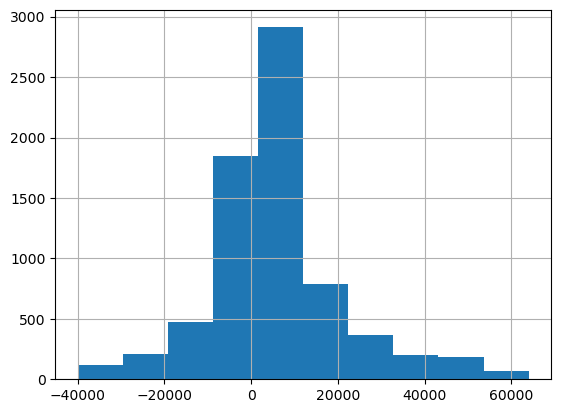

In [86]:
# Hist Plot to check the Distribution of the data

Group20_data['GOP_diff_wrt_py'].hist()

<AxesSubplot:xlabel='GOP_diff_wrt_py'>

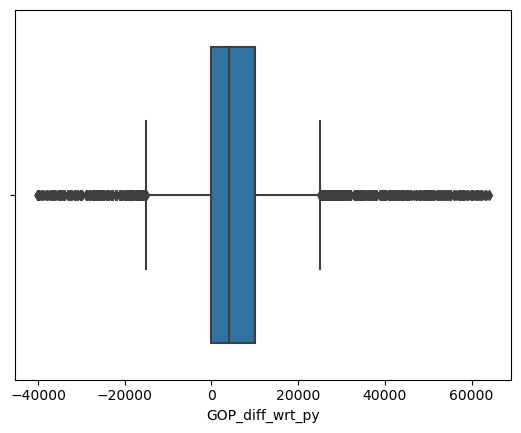

In [87]:
# Box plot to check the Outlier of the data

sns.boxplot(x=Group20_data['GOP_diff_wrt_py'])

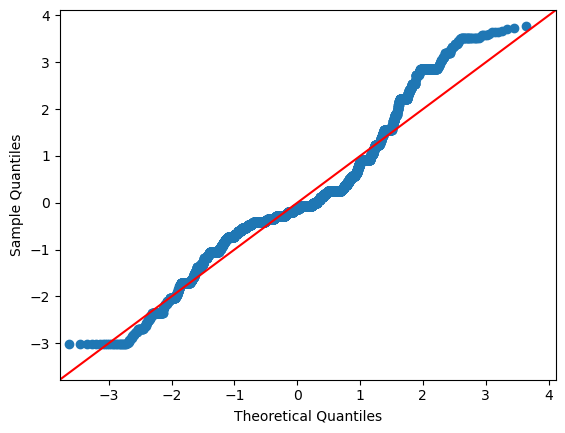

In [88]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(Group20_data['GOP_diff_wrt_py'],line='45',fit=True,dist=stats.norm)

pylab.show()

# Inference from Histogram:
    
** From Histogram it looks like the shape of the Curve is similar to Normal Distribution. It could be t-distribution but to 
** infer anything statiscally some other will be required.

Inference from Boxplot
    
** Box plot shows that there are outliers on both side of the Mean , but due to more outlier on the right side of the mean , data looks bit skewed towards right.

Inference from QQ-Plot
    
** From QQ-Plot we can infer that measure is nearlly Normally distributed.

# Second Measures : Perf_effi_per_emp

In [89]:
# Check Summary Stats of the Measure
Group20_data['Perf_effi_per_emp'].describe()

count     7158.000000
mean     29692.972483
std      20104.975796
min          0.000000
25%      14333.333333
50%      25000.000000
75%      40000.000000
max      92515.000000
Name: Perf_effi_per_emp, dtype: float64

In [90]:
# Null Check
pd.isnull(Group20_data['Perf_effi_per_emp']).any()

False

<AxesSubplot:>

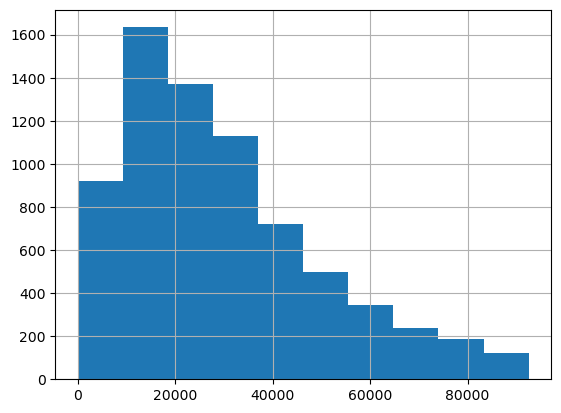

In [91]:
# Hist Plot to check the Distribution of the data

Group20_data['Perf_effi_per_emp'].hist()

<AxesSubplot:xlabel='Perf_effi_per_emp'>

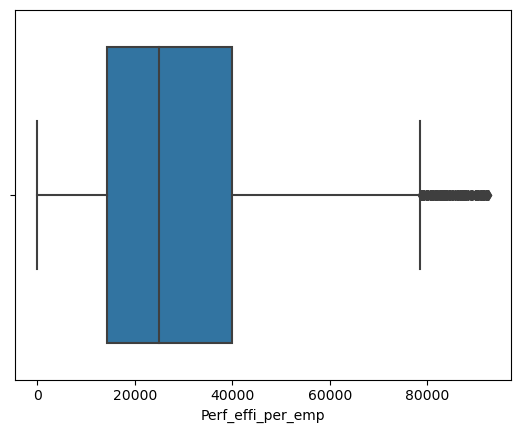

In [92]:
# Box plot to check the Outlier of the data

sns.boxplot(x=Group20_data['Perf_effi_per_emp'])

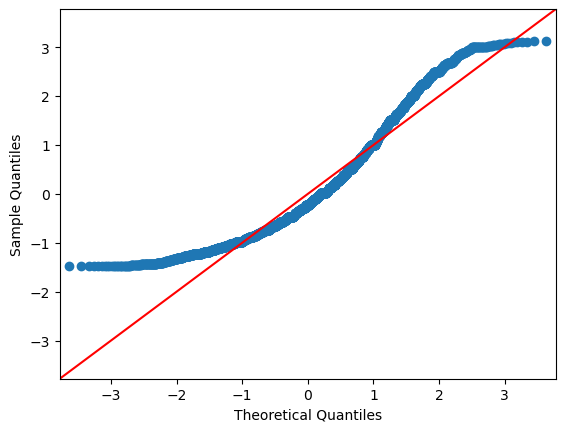

In [93]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(Group20_data['Perf_effi_per_emp'],line='45',fit=True,dist=stats.norm)

pylab.show()

# Inference from Histogram:
    
** From Histogram it looks like the shape of the Curve is similar to Normal Distribution. 
** From the histplot it also clear that data is right skewed. It could be t-distribution but to infer anything statiscally 
** some other tests will be required.

Inference from Boxplot
    
** Box plot shows that there are outliers on right side of the Mean & data is skewed towards right.

Inference from QQ-Plot
    
** From QQ-Plot we can infer that measure is nearlly Uniformaly distributed.